In [1]:
#For this project you will visualize time series data using a line chart, bar chart, and box plots. 
#You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day 
#on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. 
#The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date', parse_dates = ['date'])

In [2]:
#Use the data to complete the following tasks:
#1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
#2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
#3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
#   The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
#   The label on the x axis should be Date and the label on the y axis should be Page Views.
#4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#   It should show average daily page views for each month grouped by year.
#   The legend should show month labels and have a title of Months. 
#   On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
#5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#   These box plots should show how the values are distributed within a given year or month and how it compares over time. 
#   The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise 
#   Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
#   The boilerplate includes commands to prepare the data.

In [ ]:
df = df[(df> df.quantile(0.025)) & (df < df.quantile(0.975))].dropna()

Text(0, 0.5, 'Page Views')

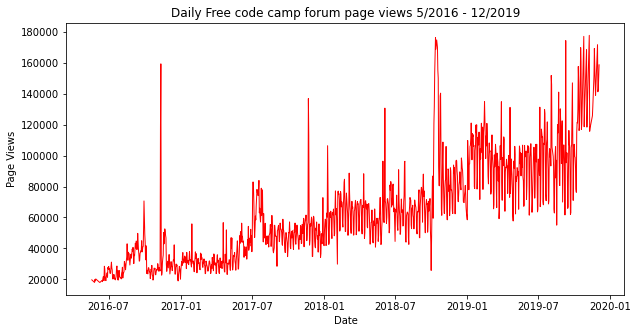

In [6]:
 fig, ax = plt.subplots(figsize = (10,5))
ax.plot(df.index, df['value'],'r',linewidth = 1)
ax.set_title ("Daily Free code camp forum page views 5/2016 - 12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

In [ ]:
#copy and modify for monthly  bat plot

In [7]:
df['month']= df.index.month
df['year'] = df.index.year
df_bar = df.groupby (['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()

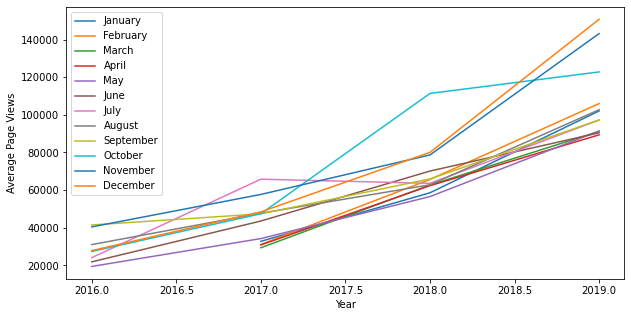

In [9]:
fig_2 = df_bar.plot(legend = True, figsize = (10,5), ylabel = "Average Page Views", xlabel ='Year' ).figure
plt.legend(['January','February','March','April','May','June','July','August','September', 'October','November','December'])

In [ ]:
#preparing data for box plots

In [10]:
df_box = df.copy()

In [11]:
df_box.reset_index(inplace = True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Page Views')]

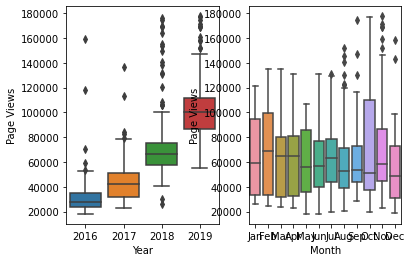

In [14]:
fig, ax = plt.subplots(1,2)
sns.boxplot(x=df_box["year"], y = df_box['value'], ax=ax[0]).set(xlabel ='Year', ylabel = 'Page Views')
sns.boxplot(x=df_box['month'], y=df_box['value'],
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'
                , 'Sep', 'Oct', 'Nov', 'Dec'],
                ax=ax[1]).set(xlabel="Month", ylabel="Page Views")

In [15]:
fig.savefig('box_plot.png')